In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus
from sklearn.model_selection import cross_val_score
import pandas as pd

from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('data/insurance.csv')
print(df.shape)
df.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [25]:
X = df.drop('smoker', axis='columns')
y = df['smoker']
print(y.shape)

(1338,)


In [26]:
X = pd.get_dummies(X)
print(X.columns)
feature_names = X.columns
print(X)
X.head()

Index(['age', 'bmi', 'children', 'expenses', 'sex_female', 'sex_male',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')
      age   bmi  children  expenses  sex_female  sex_male  region_northeast  \
0      19  27.9         0  16884.92           1         0                 0   
1      18  33.8         1   1725.55           0         1                 0   
2      28  33.0         3   4449.46           0         1                 0   
3      33  22.7         0  21984.47           0         1                 0   
4      32  28.9         0   3866.86           0         1                 0   
...   ...   ...       ...       ...         ...       ...               ...   
1333   50  31.0         3  10600.55           0         1                 0   
1334   18  31.9         0   2205.98           1         0                 1   
1335   18  36.9         0   1629.83           1         0                 0   
1336   21  25.8       

,age,bmi,children,expenses,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,1,0,0,0,0,1
1,18,33.8,1,1725.55,0,1,0,0,1,0
2,28,33.0,3,4449.46,0,1,0,0,1,0
3,33,22.7,0,21984.47,0,1,0,1,0,0
4,32,28.9,0,3866.86,0,1,0,1,0,0


In [27]:
X_train, X_test, y_train, y_test = train_test_split( X, y,stratify=y, random_state=2)

In [67]:
# Perform cross validation varying the depth of the tree. 

for d in range(2,12):
    tree = DecisionTreeClassifier(max_depth=d)
    scores = cross_val_score(tree, X_train, y_train, cv=5)
    print("Depth: ", d, "Accuracy:", scores.mean())

Depth:  2 Accuracy: 0.9282288557213931
Depth:  3 Accuracy: 0.9601194029850746
Depth:  4 Accuracy: 0.9591243781094526
Depth:  5 Accuracy: 0.9611194029850745
Depth:  6 Accuracy: 0.9561442786069652
Depth:  7 Accuracy: 0.9621293532338309
Depth:  8 Accuracy: 0.9631293532338308
Depth:  9 Accuracy: 0.961139303482587
Depth:  10 Accuracy: 0.9561542288557213
Depth:  11 Accuracy: 0.9581542288557212


In [68]:
tree = DecisionTreeClassifier(max_depth=7)
tree = tree.fit(X_train,y_train)

#Predict the response for test dataset
y_hat = tree.predict(X_test)
print("Test Accuracy: ", tree.score(X_test, y_test))

Test Accuracy:  0.9582089552238806


In [69]:
cm = confusion_matrix(y_test, y_hat)
 
print("CM", cm)
print()
 
tn, fp, fn, tp = cm.ravel()
print("TN", tn, "FP", fp, "FN", fn, "TP", tp)

CM [[259   7]
 [  7  62]]

TN 259 FP 7 FN 7 TP 62


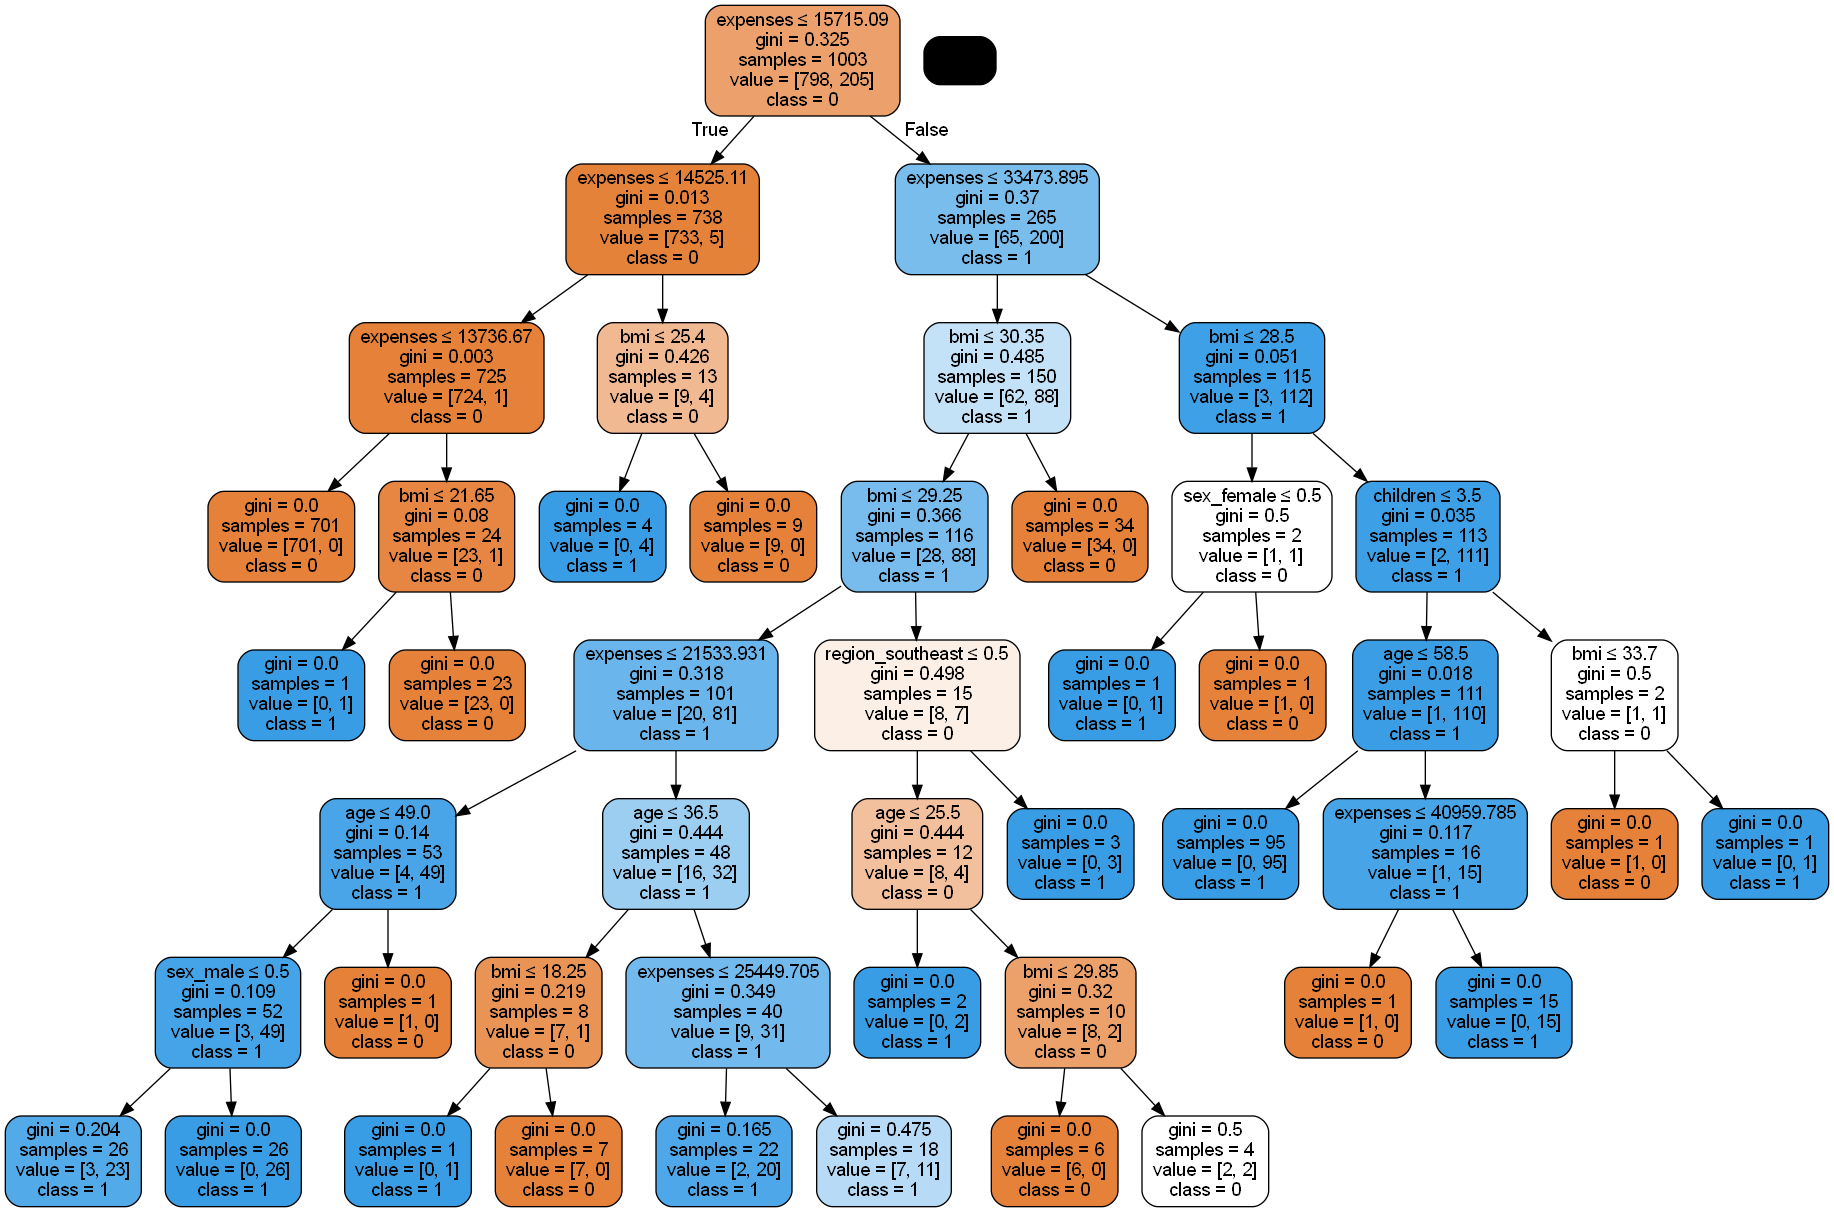

In [70]:
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,
                filled=True, rounded=True,
               special_characters=True, class_names=['0','1'],
                feature_names = feature_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Plots/insurance.png')
Image(graph.create_png())